In [107]:
import pandas as pd
import numpy as np
from datetime import datetime

import boto3
from sagemaker import get_execution_role
import sagemaker.amazon.common as smac

import matplotlib.pyplot as plt
import seaborn as sn


In [108]:
role = get_execution_role()
bucket = 'ml-vish-wine'
prefix ='wine_dataset'
data_key = 'Wine.csv'
data_location = 's3://{}/{}/{}'.format(bucket,prefix,data_key)

df = pd.read_csv(data_location, low_memory = False)
df[:14]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [109]:
df = df.drop(['Customer_Segment'], axis = 1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [110]:
df.shape

(178, 13)

In [111]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [112]:
missing_values = df.isnull().values.any()
print('Are there any missing values? {}'.format(missing_values))
if(missing_values):
    df[df/isnull().any(axis=1)]

Are there any missing values? False


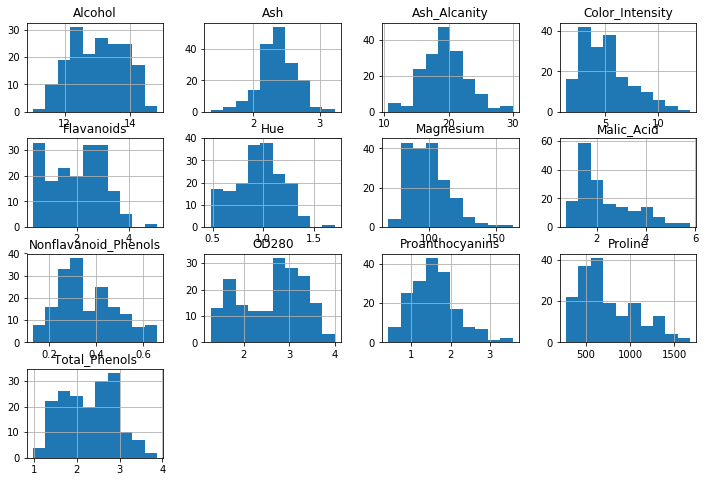

In [113]:
df.hist(figsize = (12,8))
plt.show()

In [114]:
corrMat = df.corr()
corrMat.style.background_gradient(cmap = 'coolwarm')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1,0.0943969,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.0717472,0.0723432,0.64372
Malic_Acid,0.0943969,1,0.164045,0.2885,-0.0545751,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.36871,-0.192011
Ash,0.211545,0.164045,1,0.443367,0.286587,0.12898,0.115077,0.18623,0.00965194,0.258887,-0.0746669,0.00391123,0.223626
Ash_Alcanity,-0.310235,0.2885,0.443367,1,-0.0833331,-0.321113,-0.35137,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.0545751,0.286587,-0.0833331,1,0.214401,0.195784,-0.256294,0.236441,0.19995,0.0553982,0.0660039,0.393351
Total_Phenols,0.289101,-0.335167,0.12898,-0.321113,0.214401,1,0.864564,-0.449935,0.612413,-0.0551364,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.35137,0.195784,0.864564,1,-0.5379,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.18623,0.361922,-0.256294,-0.449935,-0.5379,1,-0.365845,0.139057,-0.26264,-0.50327,-0.311385
Proanthocyanins,0.136698,-0.220746,0.00965194,-0.197327,0.236441,0.612413,0.652692,-0.365845,1,-0.0252499,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.19995,-0.0551364,-0.172379,0.139057,-0.0252499,1,-0.521813,-0.428815,0.3161


In [115]:
from sklearn import preprocessing

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [116]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
0     178 non-null float64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null float64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB
None


In [118]:
from sagemaker import KMeans

In [129]:
data_train = df.values.astype('float32')
data_train

array([[0.84210527, 0.19169961, 0.5721925 , ..., 0.45528457, 0.970696  ,
        0.5613409 ],
       [0.5710526 , 0.2055336 , 0.4171123 , ..., 0.46341464, 0.7802198 ,
        0.55064195],
       [0.5605263 , 0.3201581 , 0.70053476, ..., 0.44715446, 0.6959707 ,
        0.64693296],
       ...,
       [0.58947366, 0.69960475, 0.48128343, ..., 0.08943089, 0.10622711,
        0.39728957],
       [0.5631579 , 0.36561266, 0.54010695, ..., 0.09756097, 0.12820514,
        0.40085593],
       [0.81578946, 0.6640316 , 0.7379679 , ..., 0.10569106, 0.12087912,
        0.20114122]], dtype=float32)

In [130]:
from sagemaker import KMeans

num_clusters = 3
output_location = 's3://' + bucket + '/model-artifacts'

kmeans = KMeans(role = role,
                train_instance_count = 1,
                train_instance_type = 'ml.c4.xlarge', 
                output_path = output_location,
                k = num_clusters)

In [131]:
job_name = 'kmeans-job-{}'.format(datetime.now().strftime("%Y%m%d%H%M%S"))
print('Here is the job name {}'.format(job_name))

Here is the job name kmeans-job-20200602185050


In [126]:
data_train.dtypes

0     float32
1     float32
2     float32
3     float32
4     float32
5     float32
6     float32
7     float32
8     float32
9     float32
10    float32
11    float32
12    float32
dtype: object

In [134]:
%%time
kmeans.fit(kmeans.record_set(data_train), job_name = job_name)

2020-06-02 19:05:49 Starting - Starting the training job...
2020-06-02 19:05:51 Starting - Launching requested ML instances......
2020-06-02 19:07:07 Starting - Preparing the instances for training.........
2020-06-02 19:08:50 Downloading - Downloading input data
2020-06-02 19:08:50 Training - Downloading the training image...
2020-06-02 19:09:16 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[06/02/2020 19:09:13 INFO 140158454175552] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_d

In [135]:
import os
model_key = 'model-artifacts/' + job_name + '/output/model.tar.gz'

boto3.resource('s3').Bucket(bucket).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')
os.system('unzip model_algo_1')

2304

In [136]:
!pip install mxnet

    100% |████████████████████████████████| 68.7MB 699kB/s eta 0:00:01
    100% |████████████████████████████████| 20.2MB 2.4MB/s eta 0:00:01   47% |███████████████                 | 9.5MB 56.5MB/s eta 0:00:01
  Found existing installation: numpy 1.14.3
    Uninstalling numpy-1.14.3:
      Successfully uninstalled numpy-1.14.3
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [138]:
import mxnet as mx
Kmeans_model_params = mx.ndarray.load('model_algo-1')

In [139]:
cluster_centroids_kmeans = pd.DataFrame(Kmeans_model_params[0].asnumpy())
cluster_centroids_kmeans.columns = df.columns
cluster_centroids_kmeans

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.324798,0.252432,0.468326,0.500198,0.237876,0.421353,0.366656,0.432995,0.384737,0.148858,0.457744,0.566028,0.157458
1,0.566729,0.479602,0.572288,0.542342,0.323175,0.261823,0.103187,0.614892,0.225270,0.516379,0.186556,0.153519,0.253745
2,0.704943,0.248985,0.587946,0.343828,0.406580,0.653774,0.557504,0.292708,0.471907,0.360898,0.475500,0.700822,0.607077
